In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [94]:
wine_df = pd.read_csv('/Users/owner/Desktop/INFO 4300/project/archive/winemag-data-130k-v2.csv')

In [95]:
wine_df = wine_df.drop('taster_name', axis = 1)
wine_df = wine_df.drop('Unnamed: 0', axis = 1)
wine_df = wine_df.drop('taster_twitter_handle', axis = 1)

In [96]:
print(f'Column names and datatypes of the first dataframe: {wine_df.dtypes}')

Column names and datatypes of the first dataframe: country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
title           object
variety         object
winery          object
dtype: object


## Dataset Description
This dataset is huge -- having 129971 rows and 11 columns. Each row is an individual type of wine. The columns are:
- country: this is the country of origin. There are 43 unique countries.
- description: this is a description of the wine by a somellier. There is an average of 40.37 words per description
- designation: this is shows where the grapes were grown
- points: this is a rating the sommolier gives after tasting the wine
- price: price of the wine
- province: this is the province of where the wine originates from
- region_1: The region which the wine originates from. 
- region_2: the region where the wine comes from. This is sometimes more specific than region_1
- title: title of the wine
- variety: type of wine
- winery: winery that the wine comes from

This is a substantive amount of data that will offer a plethora of reccomendation options due to its sheer size. 

## Why does this dataset work for the Cork Dorks?
This dataset is perfect for use in our wine reccomendation system. It allows for the user to selection specific attributes of wine they may enjoy and the system will return wines that the user will likely enjoy. There are many columns that may lead to one enjoying a specific wine or not enjoying it. This allows for more options for the user of the wine to use more specific descriptors.

In [97]:
print(f'Summary Stats of DataFrame:\n{wine_df.describe()}')

Summary Stats of DataFrame:
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


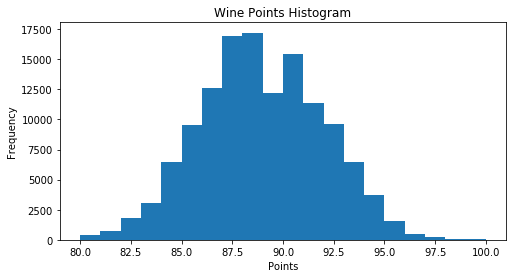

In [98]:
plt.figure(figsize = (8,4))
plt.hist(wine_df.points,bins=20);
plt.ylabel('Frequency');
plt.xlabel('Points');
plt.title('Wine Points Histogram');

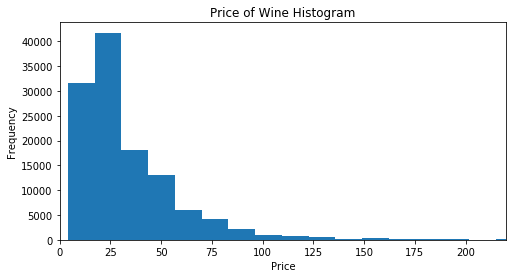

In [118]:
plt.figure(figsize = (8,4))
plt.hist(wine_df.price, bins = 250);
plt.xlim(0, 220)
plt.ylabel('Frequency');
plt.xlabel('Price');
plt.title('Price of Wine Histogram');

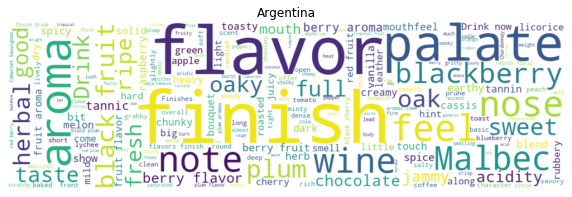

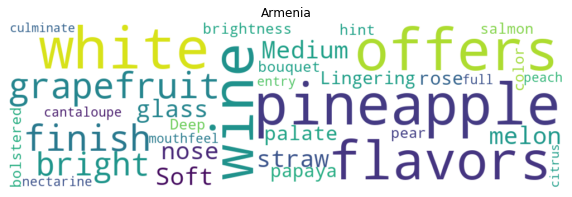

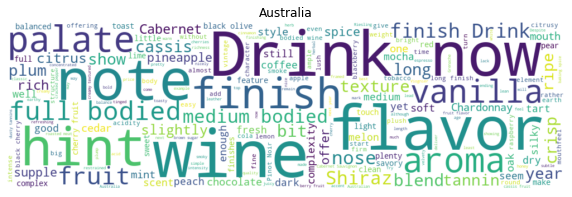

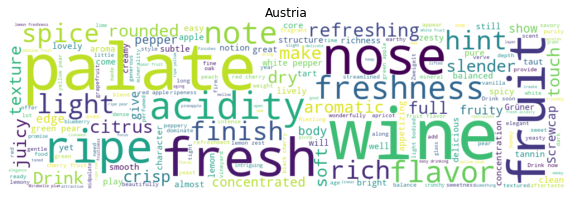

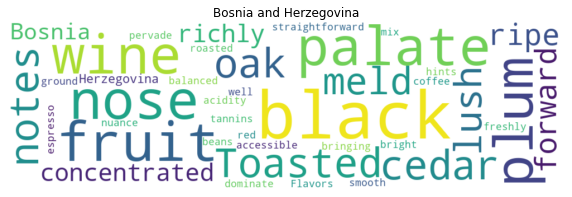

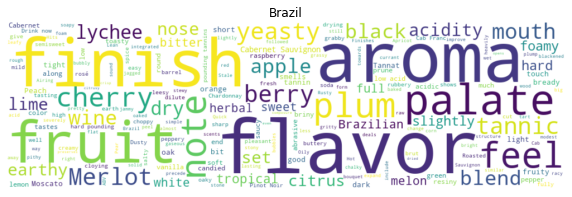

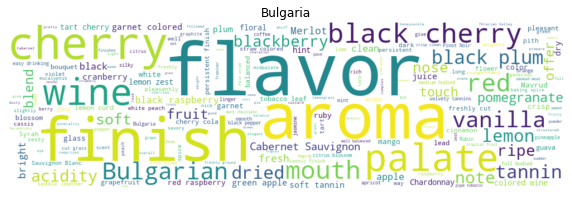

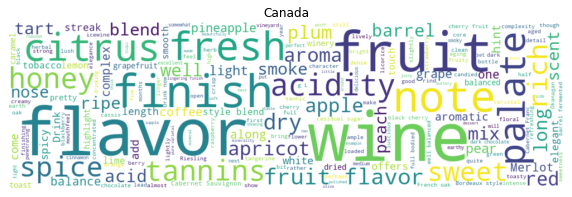

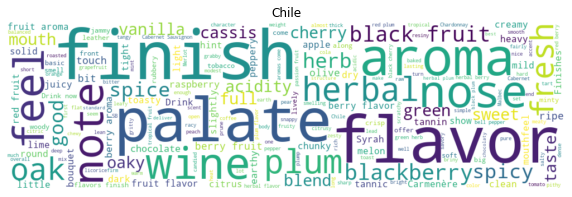

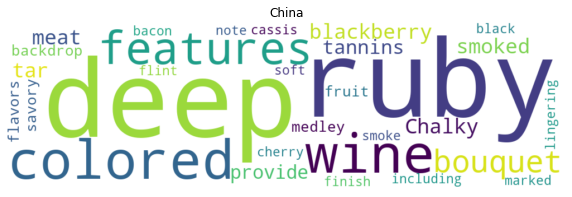

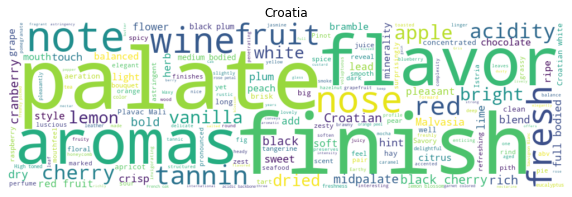

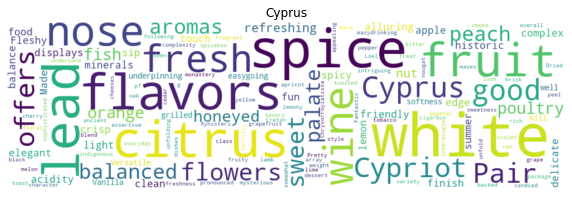

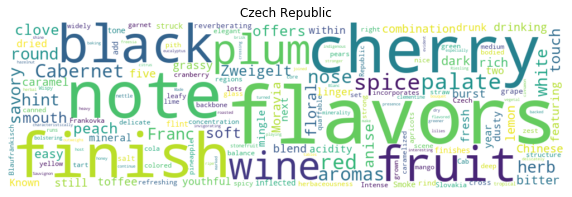

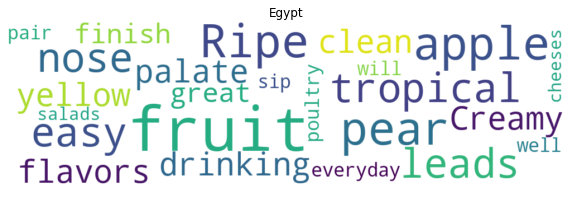

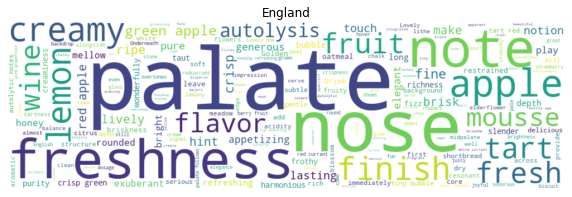

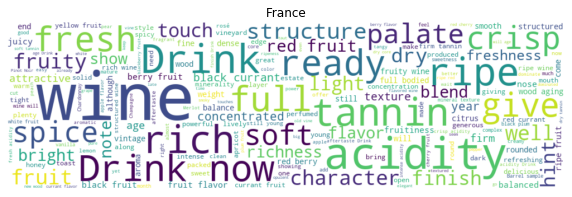

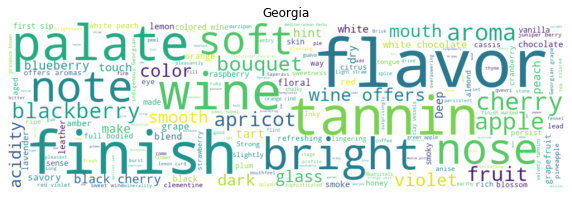

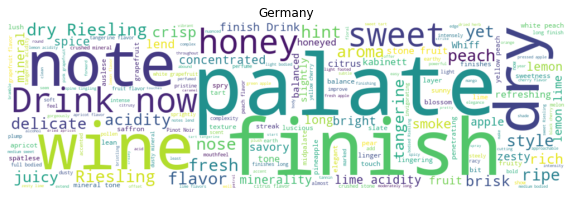

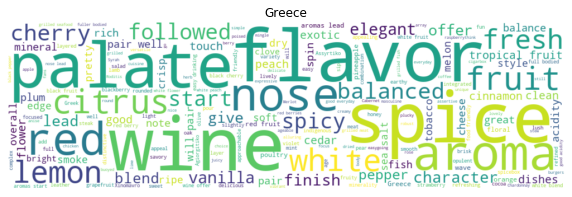

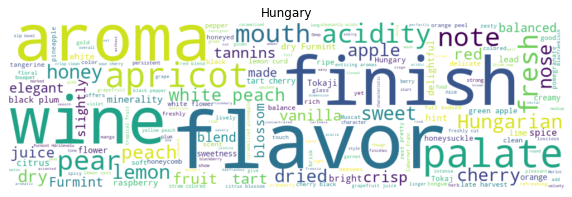

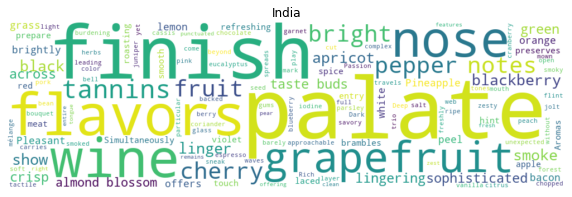

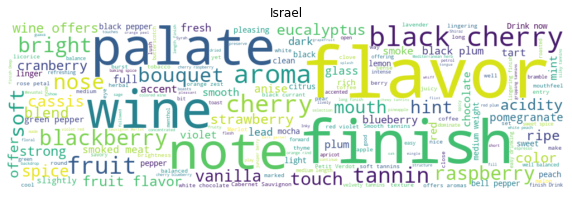

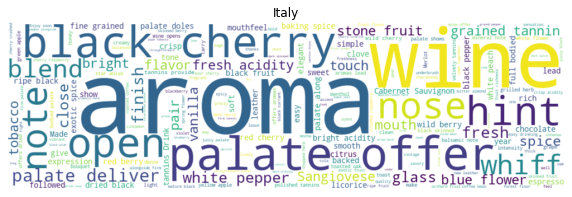

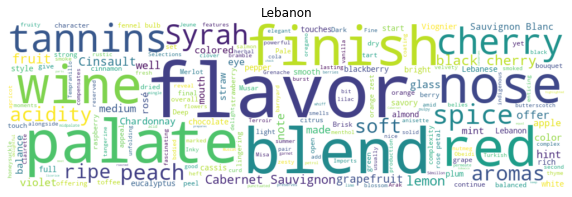

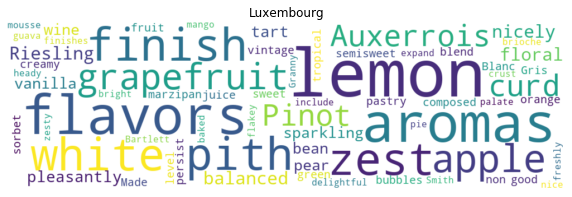

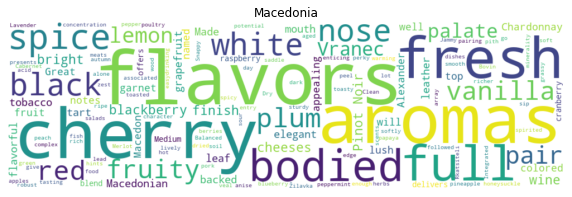

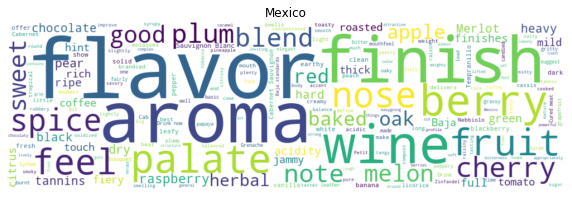

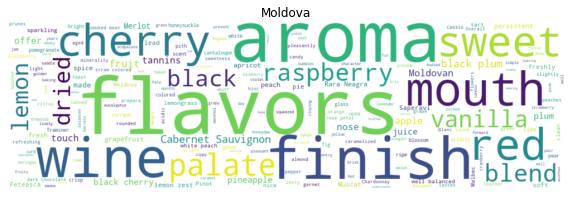

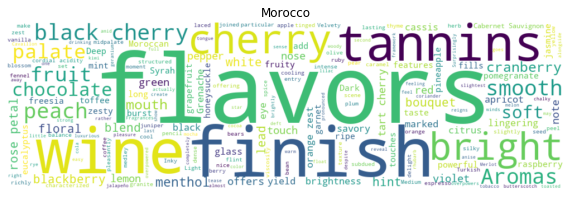

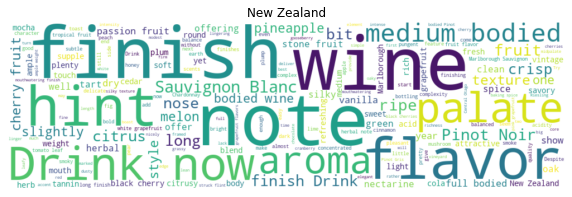

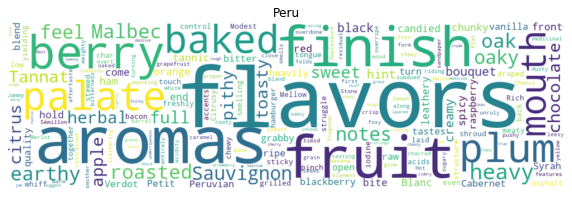

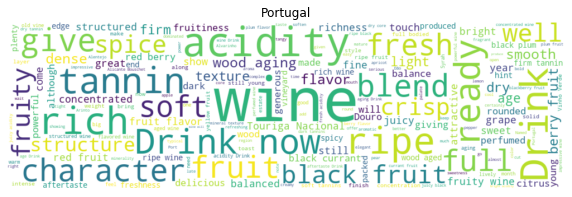

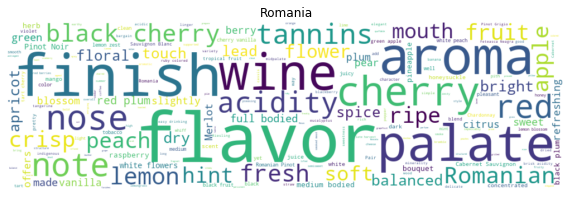

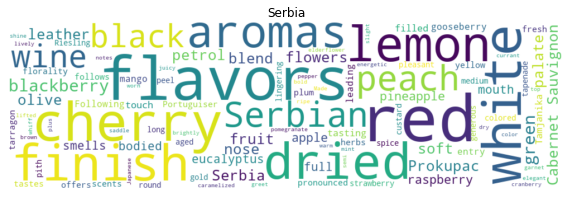

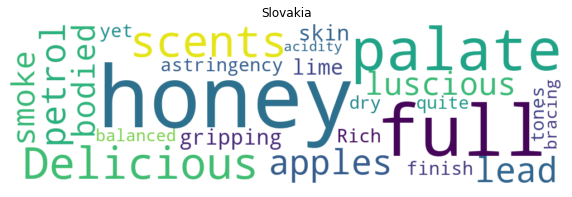

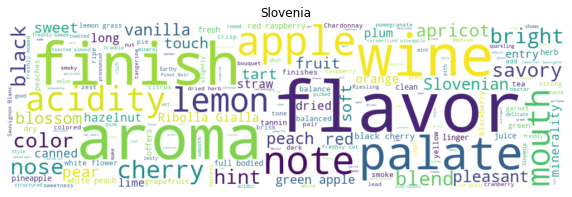

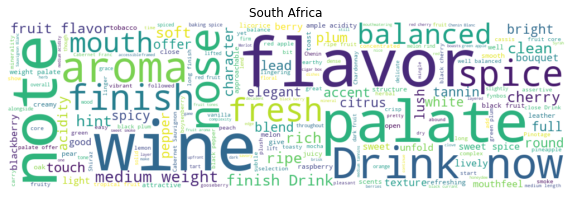

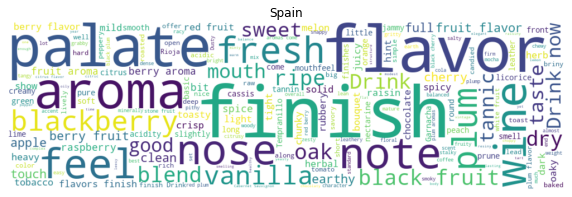

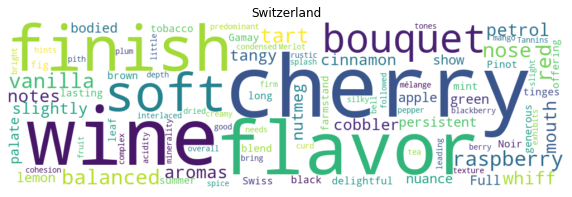

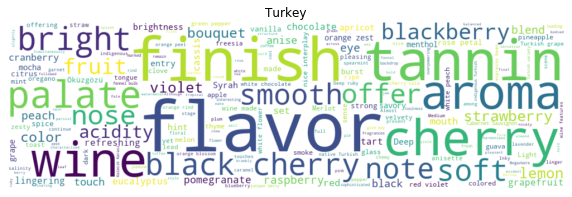

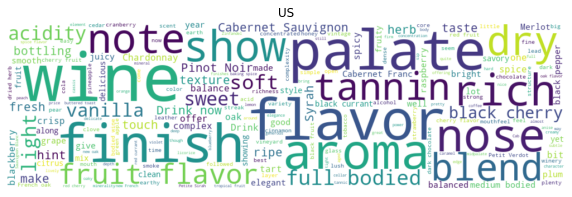

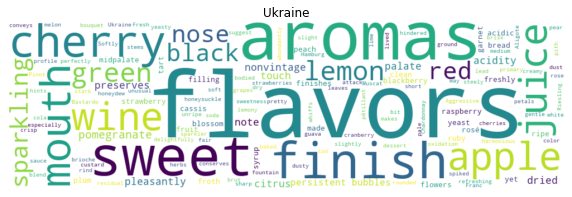

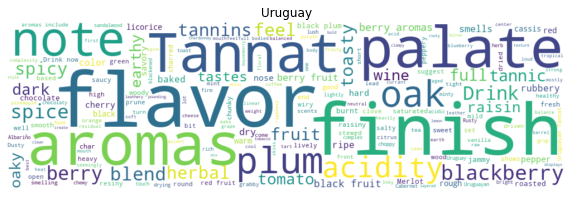

In [103]:
grouped = wine_df.groupby('country')['description'].apply(lambda x: ' '.join(x)).reset_index()
for i in range(len(grouped)):
    country = grouped.loc[i, 'country']
    text = grouped.loc[i, 'description']
    wordcloud = WordCloud(width=1000, height=300, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(country)
    plt.show()